In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("supply_chain_data.csv")

In [4]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [22]:
#To Check NULL Values and data type of of datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [24]:
#location wise counts

location_counts = df['Location'].value_counts()
location_counts

Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64

In [7]:
grouped_Location = df.groupby(['Location', 'Product type']).size().reset_index(name='Counts')
grouped_Location

,Location,Product type,Counts
0,Bangalore,cosmetics,3
1,Bangalore,haircare,9
2,Bangalore,skincare,6
3,Chennai,cosmetics,5
4,Chennai,haircare,6
5,Chennai,skincare,9
6,Delhi,cosmetics,6
7,Delhi,haircare,4
8,Delhi,skincare,5
9,Kolkata,cosmetics,4


Explore location wise products¶


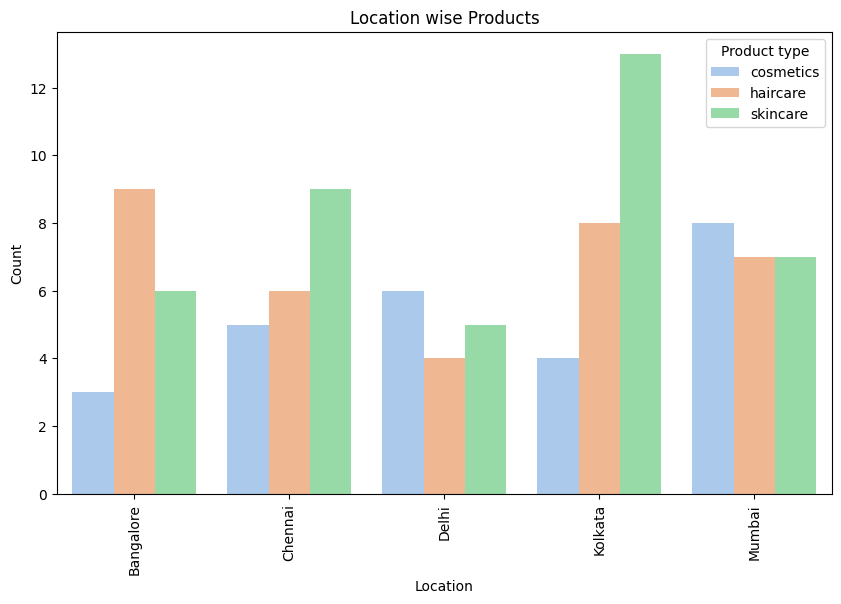

In [8]:
# Create a bar chart
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='Counts', hue = 'Product type', data = grouped_Location,palette='pastel')
plt.xticks(rotation=90) 

# Rotate x-axis labels for better visibility if needed
plt.title("Location wise Products")
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [9]:
Transport_modes = df['Transportation modes'].value_counts()
Transport_modes

Transportation modes
Road    29
Rail    28
Air     26
Sea     17
Name: count, dtype: int64

Explore mode of Transports¶

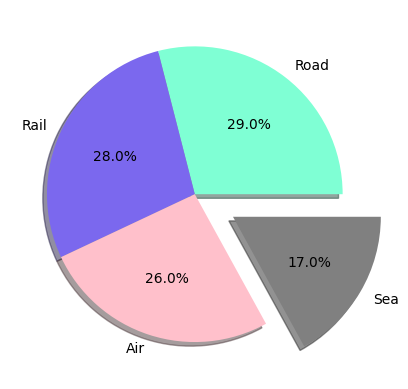

In [10]:
colors = ("aquamarine","mediumslateblue","pink", "grey")
explode = [0.3 if i == 'Sea' else 0 for i in Transport_modes.index]
plt.pie(x = Transport_modes, labels = Transport_modes.index, shadow=True, colors = colors, autopct='%1.1f%%', explode = explode)
plt.show()

In [11]:
total_revenue = df.groupby('Location')['Revenue generated'].sum()
total_revenue

Location
Bangalore    102601.723882
Chennai      119142.815748
Delhi         81027.701225
Kolkata      137077.551005
Mumbai       137755.026877
Name: Revenue generated, dtype: float64

Explore of Revenue Field

Looks like Mumbai location has more sales than any other

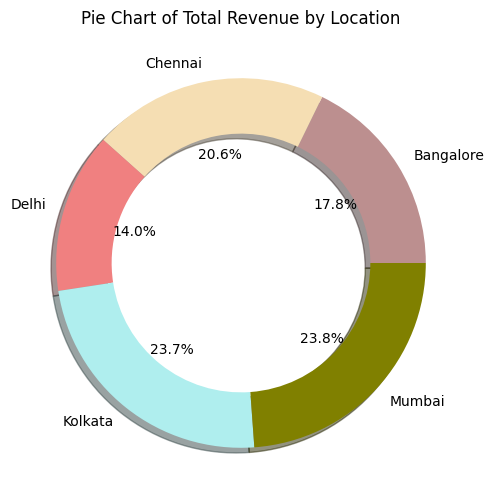

In [12]:
colors = ("rosybrown","wheat","lightcoral", "paleturquoise", "olive" )
plt.figure(figsize=(10, 6))
plt.pie(total_revenue, labels = total_revenue.index, autopct='%1.1f%%', colors = colors, shadow = True,wedgeprops=dict(width=0.3))

plt.title('Pie Chart of Total Revenue by Location')

plt.show()

Skincare products have an average availability of 95 units with 736 units sold.

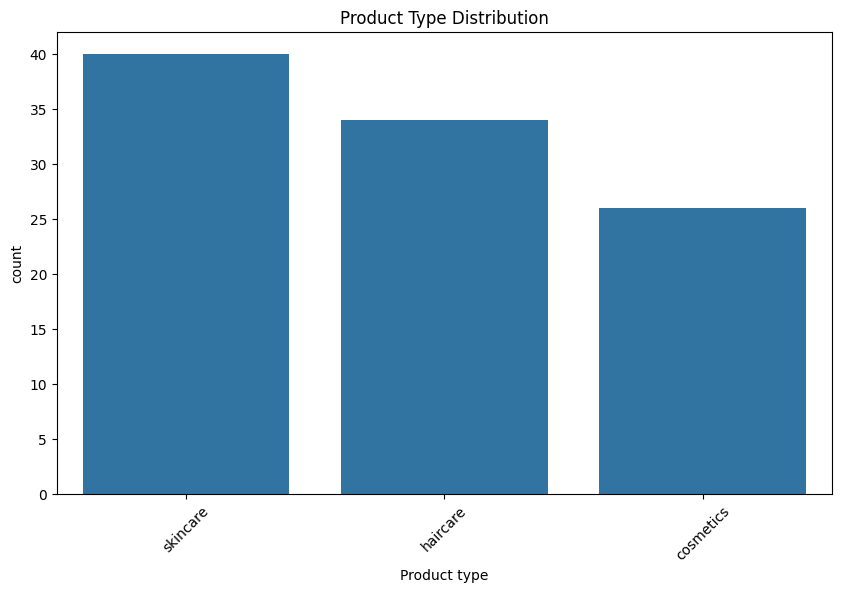

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product type', order=df['Product type'].value_counts().index)
plt.title('Product Type Distribution')
plt.xticks(rotation=45)
plt.show()

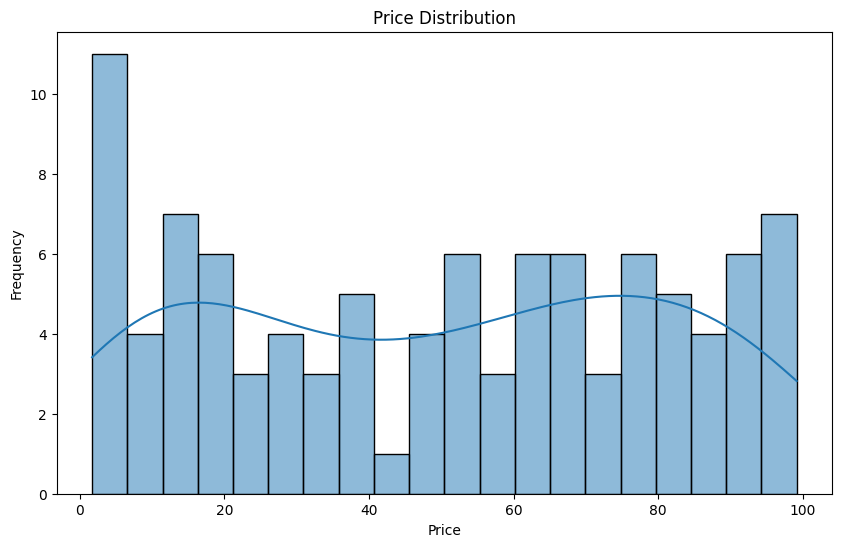

In [14]:
#Checking price distribution

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Explore the Defect rates on product type¶

In [15]:
grouped_df = df.groupby(['Product type', 'Defect rates']).sum().reset_index()[['Product type', 'Defect rates']]

In [16]:
grouped_df

,Product type,Defect rates
0,cosmetics,0.018608
1,cosmetics,0.102021
2,cosmetics,0.333432
3,cosmetics,0.398177
4,cosmetics,0.447194
...,...,...
95,skincare,4.231417
96,skincare,4.746649
97,skincare,4.854068
98,skincare,4.911096


C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_15308\2991140290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Defect rates', y = 'Product type', data =grouped_df, estimator = "mean", palette='inferno' )


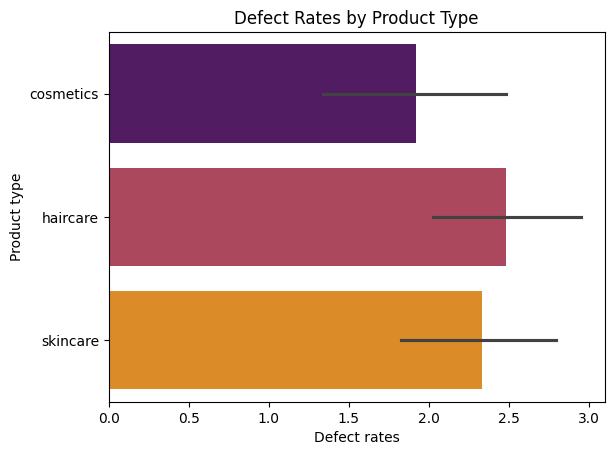

In [17]:
# Haircare products has more defects

sns.barplot(x = 'Defect rates', y = 'Product type', data =grouped_df, estimator = "mean", palette='inferno' )
plt.title("Defect Rates by Product Type")
plt.show()

In [18]:
grouped_df1 = df.groupby(['Transportation modes', 'Defect rates']).sum().reset_index()[['Transportation modes', 'Defect rates']]

In [19]:
grouped_df1

,Transportation modes,Defect rates
0,Air,0.018608
1,Air,0.021170
2,Air,0.100683
3,Air,0.102021
4,Air,0.159486
...,...,...
95,Sea,3.541046
96,Sea,3.632843
97,Sea,3.693738
98,Sea,4.096881


C:\Users\PRATEEK\AppData\Local\Temp\ipykernel_15308\3915539445.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Defect rates', y = 'Transportation modes', data =grouped_df1, estimator = "mean", palette='coolwarm' )


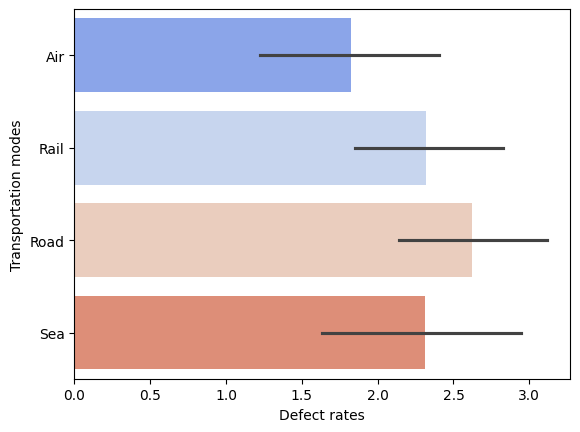

In [20]:
sns.barplot(x = 'Defect rates', y = 'Transportation modes', data =grouped_df1, estimator = "mean", palette='coolwarm' )
plt.title = ("Defect Rates by Transport modes")
plt.show()

Shipping & Transportation:

Different shipping carriers are used (Carrier A, Carrier B, Carrier C) with varying shipping costs.

Transportation modes vary, including Road, Air, and Rail, with different routes and associated costs.

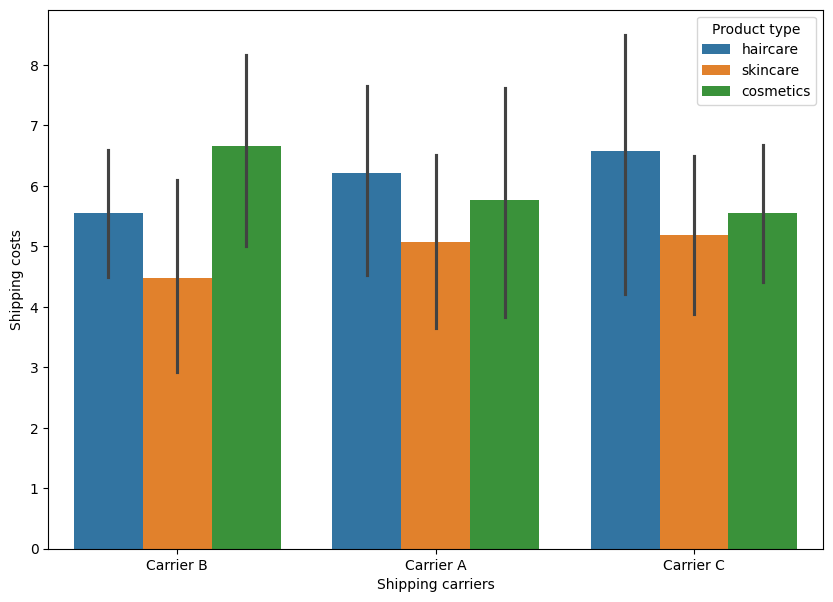

In [21]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Shipping carriers' , y = 'Shipping costs' , data =df, hue='Product type' )
plt.show()